In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r'C:\Users\spdpr\Downloads\spam.csv',encoding='latin')

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
dataset.rename(columns={'v1':'Category','v2':'Message'},inplace=True)

In [11]:
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
dataset['Message Length'] = dataset['Message'].apply(len)

In [14]:
dataset.head()

,Category,Message,Message Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='Message Length', ylabel='Count'>

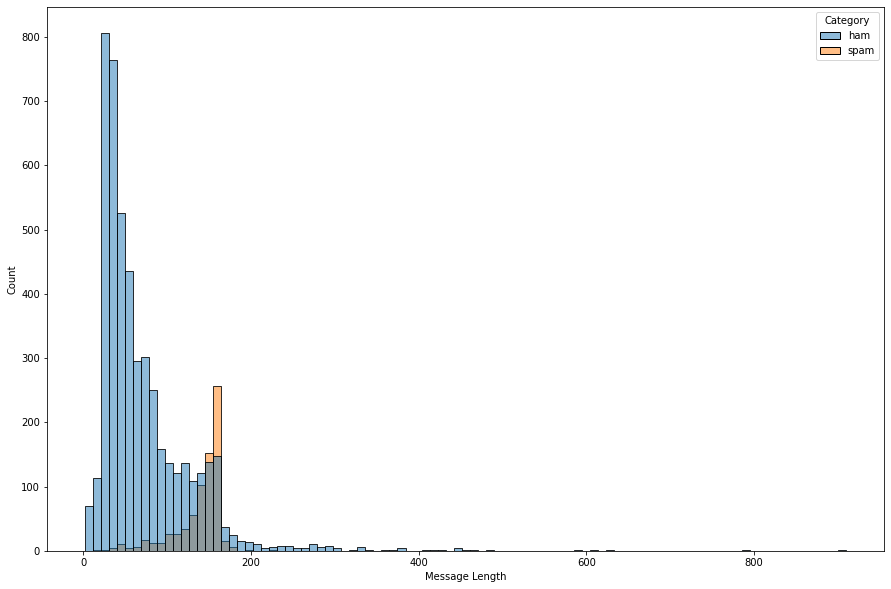

In [16]:
fig = plt.figure(figsize=(15,10))
sns.histplot(data=dataset,x='Message Length', hue='Category')

<AxesSubplot:xlabel='Category', ylabel='count'>

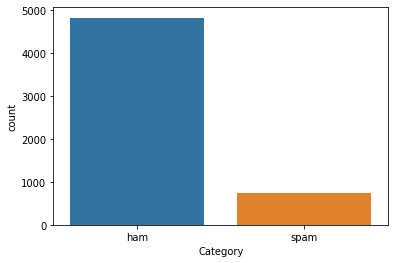

In [21]:
sns.countplot(data=dataset,x='Category')

In [17]:
ham_desc = dataset[dataset['Category']=='ham'].describe()

In [18]:
spam_desc = dataset[dataset['Category']=='spam'].describe()

In [19]:
print(ham_desc)

       Message Length
count     4825.000000
mean        71.023627
std         58.016023
min          2.000000
25%         33.000000
50%         52.000000
75%         92.000000
max        910.000000


In [20]:
print(spam_desc)

       Message Length
count      747.000000
mean       138.866131
std         29.183082
min         13.000000
25%        132.500000
50%        149.000000
75%        157.000000
max        224.000000


In [24]:
dataset.index

RangeIndex(start=0, stop=5572, step=1)

In [25]:
minority_len=len(dataset[dataset["Category"]=="spam"])
majority_len=len(dataset[dataset["Category"]=="ham"])
minority_indices=dataset[dataset["Category"]=="spam"].index
majority_indices=dataset[dataset["Category"]=="ham"].index
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
df=dataset.loc[undersampled_indices]
df=df.sample(frac=1)
df=df.reset_index()
df=df.drop(
    columns=["index"],
)

In [26]:
df.shape

(1494, 3)

<AxesSubplot:xlabel='Category', ylabel='count'>

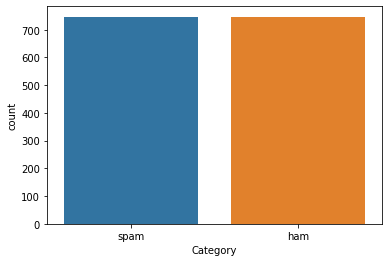

In [28]:
sns.countplot(data=df,x='Category')

In [34]:
df['Label'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [42]:
df.head(5)

,Category,Message,Message Length,Label
0,spam,Congratulations YOU'VE Won. You're a Winner in...,115,1
1,spam,Fantasy Football is back on your TV. Go to Sky...,162,1
2,spam,Moby Pub Quiz.Win a å£100 High Street prize if...,162,1
3,spam,INTERFLORA - åÒIt's not too late to order Inte...,137,1
4,spam,URGENT! We are trying to contact U. Todays dra...,158,1


In [44]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [47]:
corpus=[]
for message in df["Message"]:
    message=re.sub("[^a-zA-Z]"," ",message)
    message=message.lower()
    message=message.split()
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    message=" ".join(message)
    corpus.append(message)

In [48]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [49]:
df['Message Length'].describe()

count    1494.000000
mean      105.848728
std        56.052314
min         3.000000
25%        51.000000
50%       120.000000
75%       153.000000
max       444.000000
Name: Message Length, dtype: float64

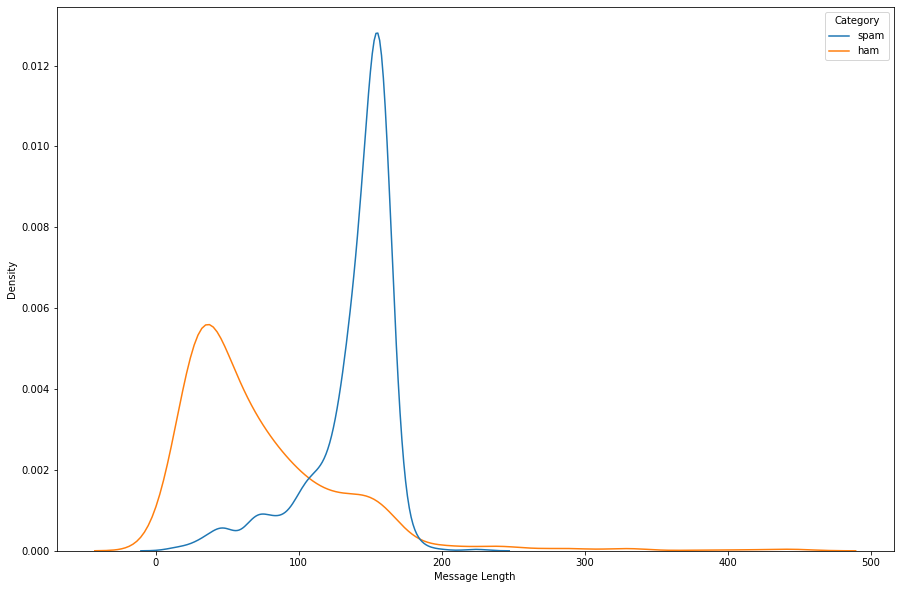

In [50]:
fig=plt.figure(figsize=(15,10))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.show()

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [52]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [53]:
df_final=pd.concat([extract_features,target],axis=1)

In [54]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,4477,6385,567,6627,4070,3385,6627,7684,1
1,0,0,0,0,0,0,0,0,0,0,...,1098,2883,3053,564,1334,769,9085,9996,9293,1
2,0,0,0,0,0,0,0,0,0,0,...,1580,6091,6371,9693,2650,7602,2047,9283,5043,1
3,0,0,0,0,0,0,0,0,0,0,...,4991,555,3715,7835,3385,2258,4991,1007,6700,1
4,0,0,0,0,0,0,0,0,0,0,...,6627,290,3385,3101,7104,1171,3996,1952,5339,1


In [55]:
x=df_final.drop("Label",axis=1)
y=df_final["Label"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=20,test_size=0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,random_state=20,test_size=0.15)

In [58]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [60]:
model=Sequential()

In [61]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [62]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [63]:
history=model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 15s 301ms/step - loss: 0.4961 - accuracy: 0.8043 - val_loss: 0.2683 - val_accuracy: 0.9110
Epoch 2/10
34/34 [==============================] - 9s 263ms/step - loss: 0.1598 - accuracy: 0.9518 - val_loss: 0.1667 - val_accuracy: 0.9529
Epoch 3/10
34/34 [==============================] - 9s 260ms/step - loss: 0.0450 - accuracy: 0.9870 - val_loss: 0.1750 - val_accuracy: 0.9581
Epoch 4/10
34/34 [==============================] - 9s 254ms/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.1723 - val_accuracy: 0.9476
Epoch 5/10
34/34 [==============================] - 9s 265ms/step - loss: 0.0346 - accuracy: 0.9963 - val_loss: 0.1603 - val_accuracy: 0.9529
Epoch 6/10
34/34 [==============================] - 9s 247ms/step - loss: 0.0114 - accuracy: 0.9972 - val_loss: 0.1931 - val_accuracy: 0.9581
Epoch 7/10
34/34 [==============================] - 9s 256ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.2008 - val_accuracy: 0.9529
Epoch

In [66]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graph_acc(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

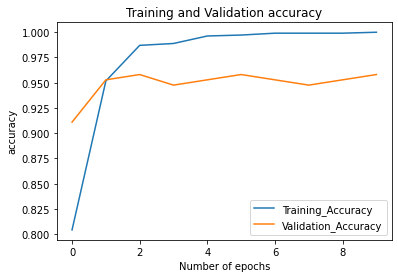

In [67]:
plot_graph_acc('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [69]:
model.save('Spam_OR_Ham_Classifier_SMS.h5')

In [70]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 2s 100ms/step


In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [72]:
print(accuracy_score(y_test,y_pred))

0.9511111111111111


array([[109,   5],
       [  6, 105]], dtype=int64)

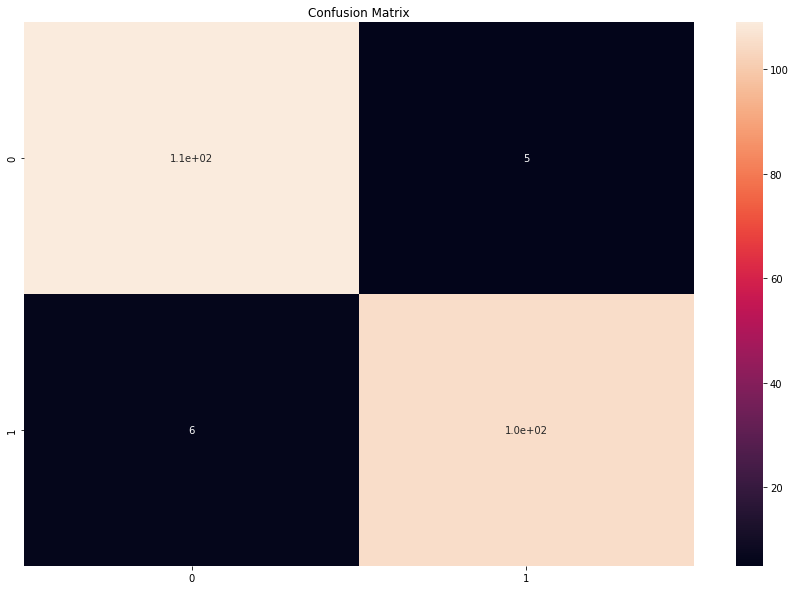

In [73]:
cm=confusion_matrix(y_test,y_pred)
fig=plt.figure(figsize=(15,10))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

# To test a Random SMS

In [74]:
def classify_message(model,message):
    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        for sentence in sentences:
            words=re.sub("[^a-zA-Z]"," ",sentence)
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)        
    oneHot=[one_hot(word,n=vocab_size)]
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    predict=model.predict(text)
    if predict>0.5:
        print("It is a spam")
        print("predict score: ", predict[0][0])
    else:
        print("It is not a spam")
        print("predict score: ", predict[0][0])

In [80]:
message1="Hello Mom. I'm fine. I'm busy right now. Can I call u later?"
message2="PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires"

In [81]:
classify_message(model,message1)

1/1 [==============================] - 0s 70ms/step
It is not a spam
predict score:  0.008738322


In [82]:
classify_message(model,message2)

1/1 [==============================] - 0s 59ms/step
It is a spam
predict score:  0.9998115
